<a href="https://colab.research.google.com/github/duaneywadey/Jupyter-notebooks-and-CSV-files/blob/main/NormalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm

df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/Jupyter-notebooks-and-CSV-files/main/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

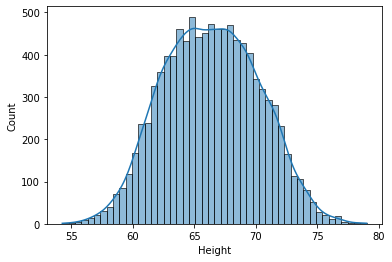

In [10]:
sns.histplot(df.Height, kde=True)

In [13]:
## HOW TO REMOVE OUTLIERS

# Step 1. Figure out the mean
mean = df.Height.mean()
mean

66.36755975482124

In [14]:
# Step 2. Identify the standard deviation
std_deviation = df.Height.std()
std_deviation

3.8475281207732293

In [28]:
# Any value in between the given values are valid, while the rest are outliers. 

value1 = mean - (3*std_deviation) # 54.82497539250156
value2 = mean + (3*std_deviation) # 77.91014411714093

In [56]:
# Display the outliers

values = df[(df.Height>77.91) | (df.Height<54.82)]
values

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [58]:
# All values without the outliers

df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

(9993, 3)

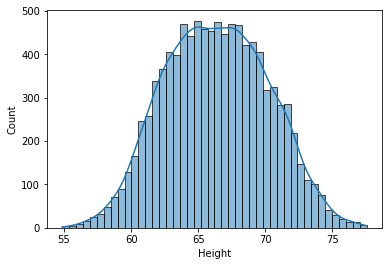

In [59]:
sns.histplot(df_no_outlier.Height, kde=True)

In [63]:
## Z Score defines how many standard deviation away a datapoint is from the mean. 

df['zscore'] = (df.Height-df.Height.mean())/df.Height.std() # Adding a zcore column to our dataframe


In [77]:
# Printing the outlier values

df[(df.zscore<-3)|(df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [79]:
# Values outside the outlier

df_no_outlier = df[(df.zscore>-3)&(df.zscore<3)]
df_no_outlier.shape

(9993, 4)